In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from pandas import read_csv, DataFrame, concat
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def run(model):
    print(model)

    # Loading Data
    df = read_csv("../data/data.csv", encoding="latin")
    df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
    df.rename({"v1": "type", "v2": "text"}, axis=1, inplace=True)
    df["type"] = df["type"].apply(lambda type: 1 if type == "spam" else 0)
    df = df[["text", "type"]]
    df = df.dropna()

    # Splitting Data
    features, labels = df["text"] , df["type"]
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2022, stratify=labels)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=2022, stratify=y_test)

    # Train Model
    pipeline = Pipeline([("vector", TfidfVectorizer()), ("model", model)]).fit(x_train, y_train)
    
    # Save Model
    with open(f"../models/{str(model)}.pkl", "wb") as f:
        pickle.dump(pipeline, f)
    
    # Train Results
    print("\nTrain Results:")
    y_pred = pipeline.predict(x_train)
    acc, pre = accuracy_score(y_train, y_pred), precision_score(y_train, y_pred, zero_division=0)
    rec, prc = recall_score(y_train, y_pred, zero_division=0), precision_recall_curve(y_train, y_pred)
    pr = auc(prc[1], prc[0])
    print(f"Accuracy: {acc}")
    print(f"Precision: {pre}")
    print(f"Recall: {rec}")
    print(f"PR_AUC: {pr}")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred), display_labels=[0, 1]).plot()
    plt.show()
    
    # Record Train Results
    df = read_csv("../data/results.csv")
    df2 = DataFrame([["sklearn", str(model), "train", acc, pre, rec, pr]], 
                    columns=["Library", "Model", "Type", "Accuracy", "Precision", "Recall", "PR_AUC"])
    df = concat([df2, df])
    if "Unnamed: 0" in df:
        df = df.drop(columns=["Unnamed: 0"])
    df.to_csv("../data/results.csv")
    
    # Valid Results
    print("Valid Results:")
    y_pred = pipeline.predict(x_val)
    acc, pre = accuracy_score(y_val, y_pred), precision_score(y_val, y_pred, zero_division=0)
    rec, prc = recall_score(y_val, y_pred, zero_division=0), precision_recall_curve(y_val, y_pred)
    pr = auc(prc[1], prc[0])
    print(f"Accuracy: {acc}")
    print(f"Precision: {pre}")
    print(f"Recall: {rec}")
    print(f"PR_AUC: {pr}")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred), display_labels=[0, 1]).plot()
    plt.show()
    
    # Record Valid Results
    df = read_csv("../data/results.csv")
    df2 = DataFrame([["sklearn", str(model), "valid", acc, pre, rec, pr]], 
                    columns=["Library", "Model", "Type", "Accuracy", "Precision", "Recall", "PR_AUC"])
    df = concat([df2, df])
    if "Unnamed: 0" in df:
        df = df.drop(columns=["Unnamed: 0"])
    df.to_csv("../data/results.csv")
    
    # Test Results
    print("Test Results:")
    y_pred = pipeline.predict(x_test)
    acc, pre = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, zero_division=0)
    rec, prc = recall_score(y_test, y_pred, zero_division=0), precision_recall_curve(y_test, y_pred)
    pr = auc(prc[1], prc[0])
    print(f"Accuracy: {acc}")
    print(f"Precision: {pre}")
    print(f"Recall: {rec}")
    print(f"PR_AUC: {pr}")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1]).plot()
    plt.show()
    
    # Record Test Results
    df = read_csv("../data/results.csv")
    df2 = DataFrame([["sklearn", str(model), "test", acc, pre, rec, pr]], 
                    columns=["Library", "Model", "Type", "Accuracy", "Precision", "Recall", "PR_AUC"])
    df = concat([df2, df])
    if "Unnamed: 0" in df:
        df = df.drop(columns=["Unnamed: 0"])
    df.to_csv("../data/results.csv")

<p style="text-align: center;">ComplementNB</p>

ComplementNB()

Train Results:
Accuracy: 0.9846153846153847
Precision: 0.9343339587242027
Recall: 0.9521988527724665
PR_AUC: 0.9464715339534628


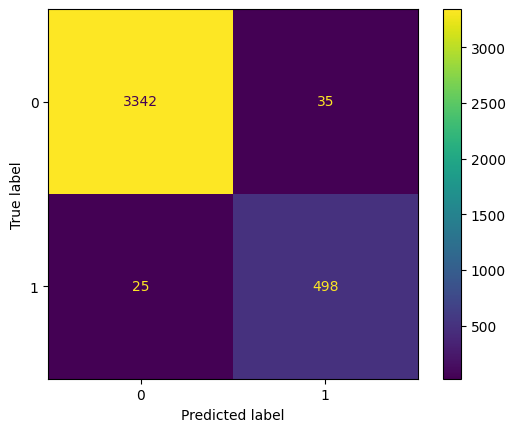

Valid Results:
Accuracy: 0.9820574162679426
Precision: 0.944954128440367
Recall: 0.9196428571428571
PR_AUC: 0.9376812679112292


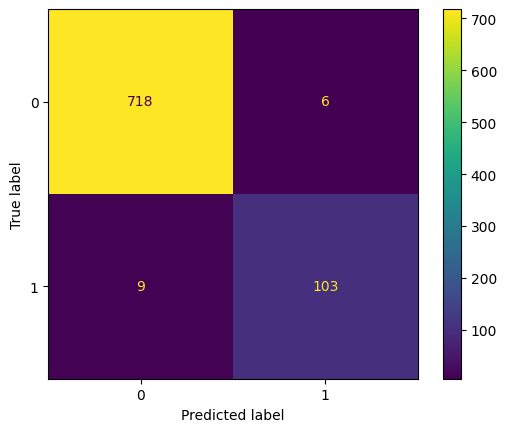

Test Results:
Accuracy: 0.9784688995215312
Precision: 0.9351851851851852
Recall: 0.9017857142857143
PR_AUC: 0.9250643971038708


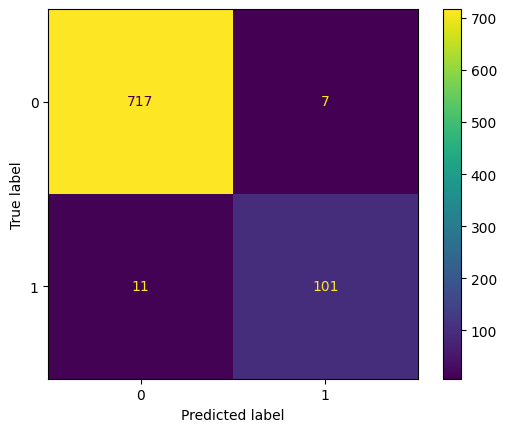

In [3]:
run(ComplementNB())

<p style="text-align: center;">Neural Network</p>

In [ ]:
run(MLPClassifier(max_iter=3000))

MLPClassifier(max_iter=3000)
